## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [23]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [24]:
df = pd.read_csv('data/final_eda_output.csv')

#### Show Top 5 Records

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74.0,218,72.666667
1,female,group C,some college,standard,completed,69,90,88.0,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93.0,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,148,49.333333
4,male,group C,some college,standard,none,76,78,75.0,229,76.333333


In [26]:
df = df.drop(columns=['total score', "average"],axis=1)

In [27]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74.0
1,female,group C,some college,standard,completed,69,90,88.0
2,female,group B,master's degree,standard,none,90,95,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0
4,male,group C,some college,standard,none,76,78,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95.0
996,male,group C,high school,free/reduced,none,62,55,55.0
997,female,group C,high school,free/reduced,completed,59,71,65.0
998,female,group D,some college,standard,completed,68,78,77.0


#### Preparing X and Y variables

In [28]:
X = df.drop(columns=['math_score'],axis=1)

In [29]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74.0
1,female,group C,some college,standard,completed,90,88.0
2,female,group B,master's degree,standard,none,95,93.0
3,male,group A,associate's degree,free/reduced,none,57,44.0
4,male,group C,some college,standard,none,78,75.0


In [30]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [31]:
y = df['math_score']

In [32]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [33]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [34]:
X = preprocessor.fit_transform(X)

In [35]:
X.shape

(1000, 19)

In [36]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [37]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3308
- Mean Absolute Error: 4.2662
- R2 Score: 0.8713
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4016
- Mean Absolute Error: 4.2210
- R2 Score: 0.8710


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5853
- Mean Absolute Error: 5.2095
- R2 Score: 0.8036
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4401
- Mean Absolute Error: 5.1376
- R2 Score: 0.8167


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3178
- Mean Absolute Error: 4.2495
- R2 Score: 0.8719
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4033
- Mean Absolute Error: 4.2217
- R2 Score: 0.8709


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6383
- Mean Absolute Error: 4.4607
- R2 Score: 0.8560
-----------------------

### Results

In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.871029
2,Ridge,0.870946
5,Random Forest Regressor,0.846266
7,AdaBoost Regressor,0.830769
6,XGBRegressor,0.820636
1,Lasso,0.816671
3,K-Neighbors Regressor,0.789191
4,Decision Tree,0.744101


## Linear Regression

In [40]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)
print(lin_model.score(X_train,y_train))
print(lin_model .score(X_test,y_test))

 Accuracy of the model is 87.10
0.871286058543818
0.8710294646992922


## Plot y_pred and y_test

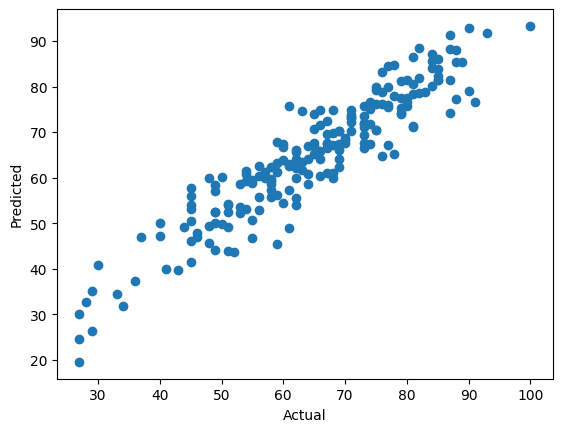

In [41]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

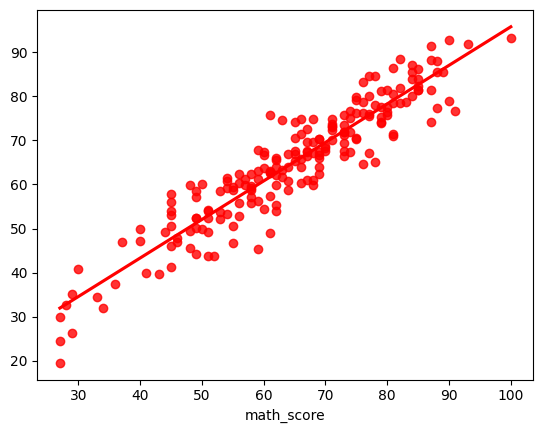

In [42]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [43]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.724609,14.275391
737,53,58.606445,-5.606445
740,80,76.521484,3.478516
660,74,76.724609,-2.724609
411,84,87.074219,-3.074219
...,...,...,...
408,52,43.757812,8.242188
332,62,62.138672,-0.138672
208,74,67.427734,6.572266
613,65,67.568359,-2.568359


## After completed all the Model buidloing Section the final part we need to save the files for creating the deployement

In [44]:
df.to_csv(r'C:\Users\vimal\OneDrive\Desktop\Machine-Learning-Project\notebook\data\final_model_output.csv', index=False)

In [45]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74.0
1,female,group C,some college,standard,completed,69,90,88.0
2,female,group B,master's degree,standard,none,90,95,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0
4,male,group C,some college,standard,none,76,78,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95.0
996,male,group C,high school,free/reduced,none,62,55,55.0
997,female,group C,high school,free/reduced,completed,59,71,65.0
998,female,group D,some college,standard,completed,68,78,77.0
